In [38]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## Visualize the data

In [174]:
#Load data
x, y = load_iris(return_X_y=True)

#Shuffle data
ind = np.random.permutation(y.shape[0])
x = x[ind,:]
y = y[ind]

#Split data
n_train = int(y.shape[0]*0.8)
x_train = x[:n_train,:]
y_train = y[:n_train]
x_test  = x[n_train:,:]
y_test  = y[n_train:]

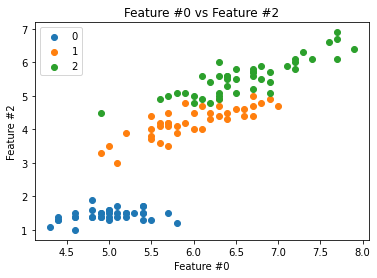

In [179]:
#Indices to visualize
ind1 = 0
ind2 = 2

#Visualize
plt.scatter(x_train[y_train==0,ind1],x_train[y_train==0,ind2])
plt.scatter(x_train[y_train==1,ind1],x_train[y_train==1,ind2])
plt.scatter(x_train[y_train==2,ind1],x_train[y_train==2,ind2])
plt.legend([0,1,2])
plt.title('Feature #' + str(ind1) + ' vs Feature #' + str(ind2))
plt.xlabel('Feature #' + str(ind1))
plt.ylabel('Feature #' + str(ind2))
plt.show()

## Keep only 2 features and 2 classes

In [41]:
#Only keep these two features
classes = [1,2]
class_inds = np.logical_or(y_train == classes[0], y_train == classes[1])
x_train = x_train[class_inds, : ]
x_train = x_train[:, [ind1,ind2]]
y_train = y_train[class_inds]
class_inds = np.logical_or(y_test == classes[0], y_test == classes[1])
x_test  = x_test [ class_inds, : ]
x_test  = x_test [ :, [ind1,ind2] ]
y_test  = y_test[class_inds]

#Remove means
x_train = np.array([a - x_train.mean(0) for a in x_train])
x_test = np.array([a - x_train.mean(0) for a in x_test])

#Make classes 0 1 instead of other numbers
temp = y_train.copy()
temp[y_train==classes[0]] = 0
temp[y_train==classes[1]] = 1
y_train = temp.copy()
temp = y_test.copy()
temp[y_test==classes[0]] = 0
temp[y_test==classes[1]] = 1
y_test = temp.copy()
n_train = x_train.shape[0]

# Logistic Regression - Define loss and gradient functions

In [42]:
#Logistic loss per sample
def logistic_loss(beta, x, y):
    return np.log( 1 + np.exp(y * np.dot(beta,x)) )

#Gradient for logistic loss per sample
def logistic_loss_grad(beta, x, y):
    return np.exp(y * np.dot(beta,x)) * y * x / ( 1 + np.exp(y * np.dot(beta,x)) ) 

#Logistic loss for whole dataset
def get_full_loss(beta, x, y, lam, loss):
    n = y.shape[0]
    loss_val = 0
    
    #Loss terms
    for i in range(n):
        loss_val += loss(beta,x[i,:],y[i])/n
        
    #Penalty term
    loss_val += ( lam / 2 ) * np.linalg.norm(beta,ord=2)**2
    return loss_val

#Gradient for logistic loss for whole dataset
def get_full_grad(beta, x, y, lam, grad):
    n = y.shape[0]
    loss_grad = 0*beta
    
    #Loss term
    for i in range(n):
        loss_grad += grad(beta,x[i,:],y[i])/n
        
    #Penalty term
    loss_grad += lam * beta
    return loss_grad

#Plotting the decision boundary
def plot_decision_boundary(x, y, beta, grid_spacing=0.01):
    # Plot test data with decision boundaries
    xx, yy = np.meshgrid(np.arange(x.min(0)[0],x.max(0)[0], grid_spacing), 
                         np.arange(x.min(0)[1],x.max(0)[1], grid_spacing))

    # Plot the decision boundary
    Z = np.array((np.c_[xx.ravel(), yy.ravel()]) @ beta > 0, dtype=int)
    Z = Z.reshape(xx.shape)
    
    #Plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.3)
    return

# Logistic Regression - Use gradient descent

In [43]:
# Hyperparameters and loss selection
loss = logistic_loss      #The loss function to use
grad = logistic_loss_grad #The corresponding gradient
lam = 0.001               #The regularization penalty
iterations = 20           #Iterations for gradient descent
stepsize = 1.0            #Step size for gradient descent

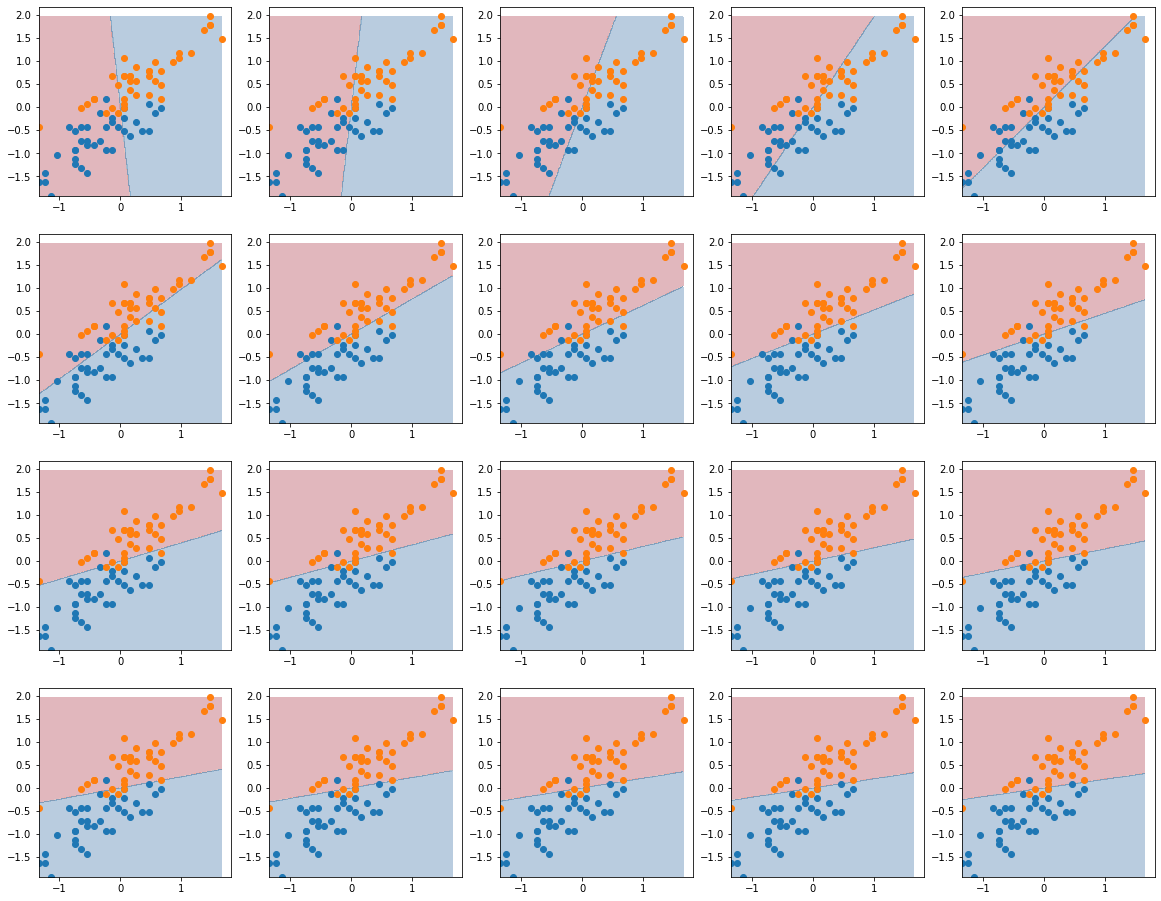

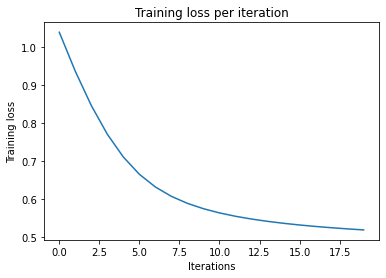

In [44]:
#Perform gradient descent and visualize
np.random.seed(0)         #Fix seed so that results aren't unpredictable when changing hyperparameters
beta = np.random.randn(2) #Beta initialization
loss_val = []
cols = 5
rows = int(np.ceil(iterations / cols ))
plt.figure(figsize=[4*cols,4*rows])
for i in range(iterations):
    loss_val.append(get_full_loss(beta, x_train, y_train, lam, loss))
    beta = beta - stepsize * get_full_grad(beta, x_train, y_train, lam, grad)
    plt.subplot(rows,cols,i+1)
    plot_decision_boundary(x_train, y_train, beta)
    plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1])
    plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1])
plt.show()

#Plot loss
plt.plot(loss_val)
plt.xlabel('Iterations')
plt.ylabel('Training loss')
plt.title('Training loss per iteration')
plt.show()

# From Sklearn

In [146]:
#Plotting function
def plot_svm_kernels(clf, X, y, X_test):
    #Plot
    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(clf.kernel)
    plt.show()

## Radial Basis Function

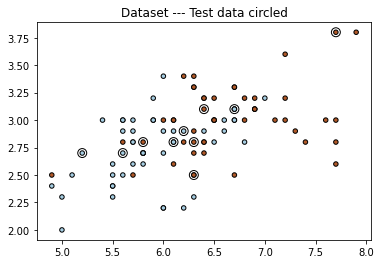

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]


#Plotting function
#Plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
            zorder=10, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

plt.title('Dataset --- Test data circled')
plt.show()

<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


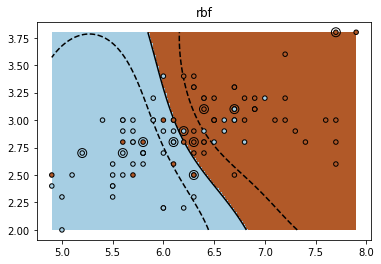

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

#Fit model
clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(X_train, y_train)

plot_svm_kernels(clf, X, y, X_test)

<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


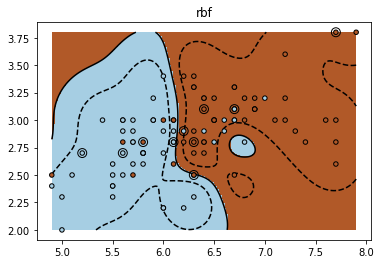

In [148]:
#Fit model
clf = svm.SVC(kernel='rbf', gamma=10)
clf.fit(X_train, y_train)

plot_svm_kernels(clf, X, y, X_test)

<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


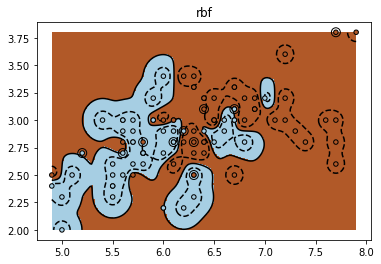

In [149]:
#Fit model
clf = svm.SVC(kernel='rbf', gamma=100)
clf.fit(X_train, y_train)

plot_svm_kernels(clf, X, y, X_test)

<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


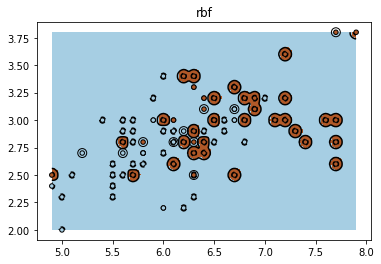

In [150]:
#Fit model
clf = svm.SVC(kernel='rbf', gamma=1000)
clf.fit(X_train, y_train)

plot_svm_kernels(clf, X, y, X_test)

$$
f(y) = \sum_{i=1}^n \alpha_i K(y, x_i)
$$

# Polynomial kernels

Fit with p = 3


<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


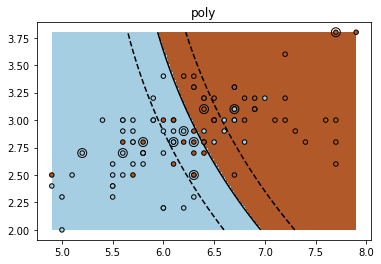

Fit with p = 4


<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


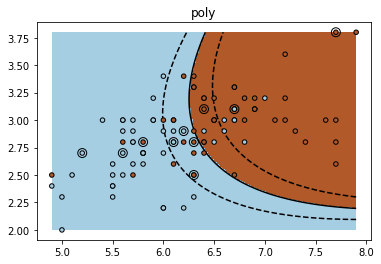

Fit with p = 5


<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


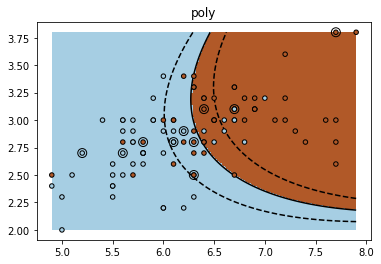

Fit with p = 6


<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


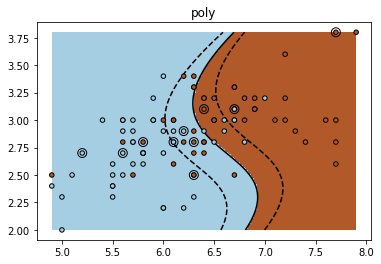

Fit with p = 7


<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


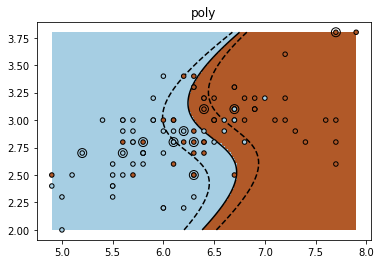

Fit with p = 8


<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


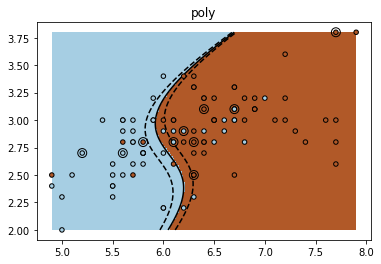

Fit with p = 9


<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


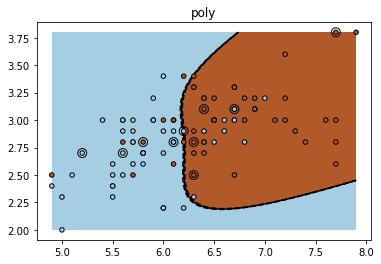

In [164]:
#Fit model
for p in range(3,10):
    print('Fit with p =', p)
    clf = svm.SVC(kernel='poly', degree=p)
    clf.fit(X_train, y_train)

    plot_svm_kernels(clf, X, y, X_test)

## Sigmoid kernels

<ipython-input-146-aec1f050970f>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


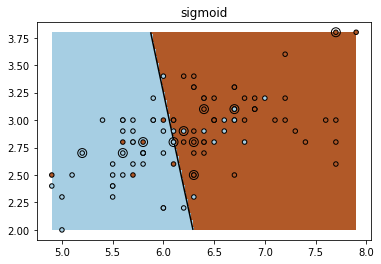

In [169]:
#Fit model
# for p in range(3,10):
#     print('Fit with p =', p)
clf = svm.SVC(kernel='sigmoid', gamma=.01)
clf.fit(X_train, y_train)

plot_svm_kernels(clf, X, y, X_test)

# Kernel regression

SVR complexity and bandwidth selected and model fitted in 1.358 s
KRR complexity and bandwidth selected and model fitted in 1.229 s
Support vector ratio: 0.320
SVR prediction for 100000 inputs in 0.606 s
KRR prediction for 100000 inputs in 0.403 s


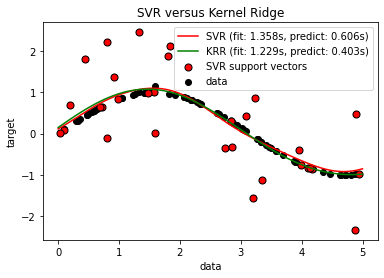

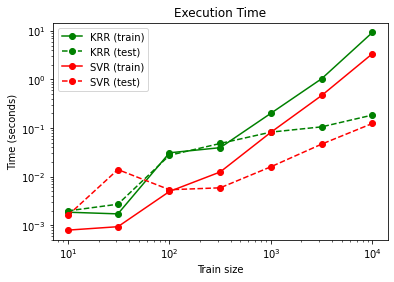

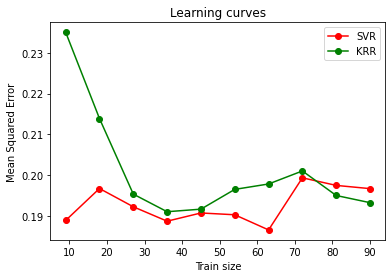

In [173]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))


# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()